# Data Science - Major Project

    Name      : U. SASIDHARAN
    E-Mail-ID : sasidharanrs03@gmail.com
    Course    : Data-Science

# Amazon Alexa Reviews Analysis:

- The project analyzes reviews by users of Amazon’s Alexa products.
- Using Natural Language Processing on the product reviews and some additional features, a machine learning model should be able to predict if the feedback is positive (1) or negative (0).
- The primary methods used are KNN,Logistic Regression,Naïve Bayes for this dataset.
- The Count vectorize is used.

## Importing Libraries

In [51]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# First of all, we load given data as a csv file:
data = pd.read_csv("/Users/Lavanya udhayakumar/OneDrive/Desktop/jupyter cod/verzeo project/amazon_alexa_data.csv")
# data set will be
data.head()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1


In [53]:
data.describe()

,Unnamed: 0,rating,feedback
count,3150.000,3150.000000,3150.000000
mean,1574.500,4.463175,0.918413
std,909.471,1.068506,0.273778
min,0.000,1.000000,0.000000
25%,787.250,4.000000,1.000000
50%,1574.500,5.000000,1.000000
75%,2361.750,5.000000,1.000000
max,3149.000,5.000000,1.000000


In [54]:
data.columns

Index(['Unnamed: 0', 'rating', 'date', 'variation', 'verified_reviews',
       'feedback'],
      dtype='object')

In [55]:
data.shape

(3150, 6)

In [56]:
# To find the data type of the column
data.dtypes

Unnamed: 0           int64
rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [57]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3150 non-null   int64 
 1   rating            3150 non-null   int64 
 2   date              3150 non-null   object
 3   variation         3150 non-null   object
 4   verified_reviews  3150 non-null   object
 5   feedback          3150 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.8+ KB


In [58]:
data.isnull().any()

Unnamed: 0          False
rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

<br> The above results implies that the dataset didn't have null values. <br>

In [59]:
data['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [60]:
data['variation']

0       Charcoal Fabric 
1       Charcoal Fabric 
2         Walnut Finish 
3       Charcoal Fabric 
4       Charcoal Fabric 
              ...       
3145          Black  Dot
3146          Black  Dot
3147          Black  Dot
3148          White  Dot
3149          Black  Dot
Name: variation, Length: 3150, dtype: object

## DATA EXPLORATION
Let's see the distribution of the all column

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

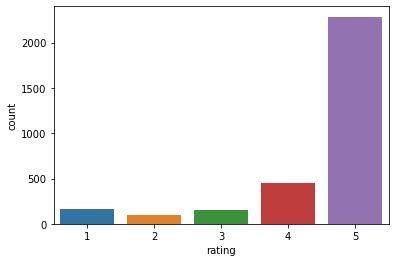

In [61]:
sns.countplot(data['rating'],label='count')

<br> Let's see the distribution of the 'variation' column<br>

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'VARIATION')

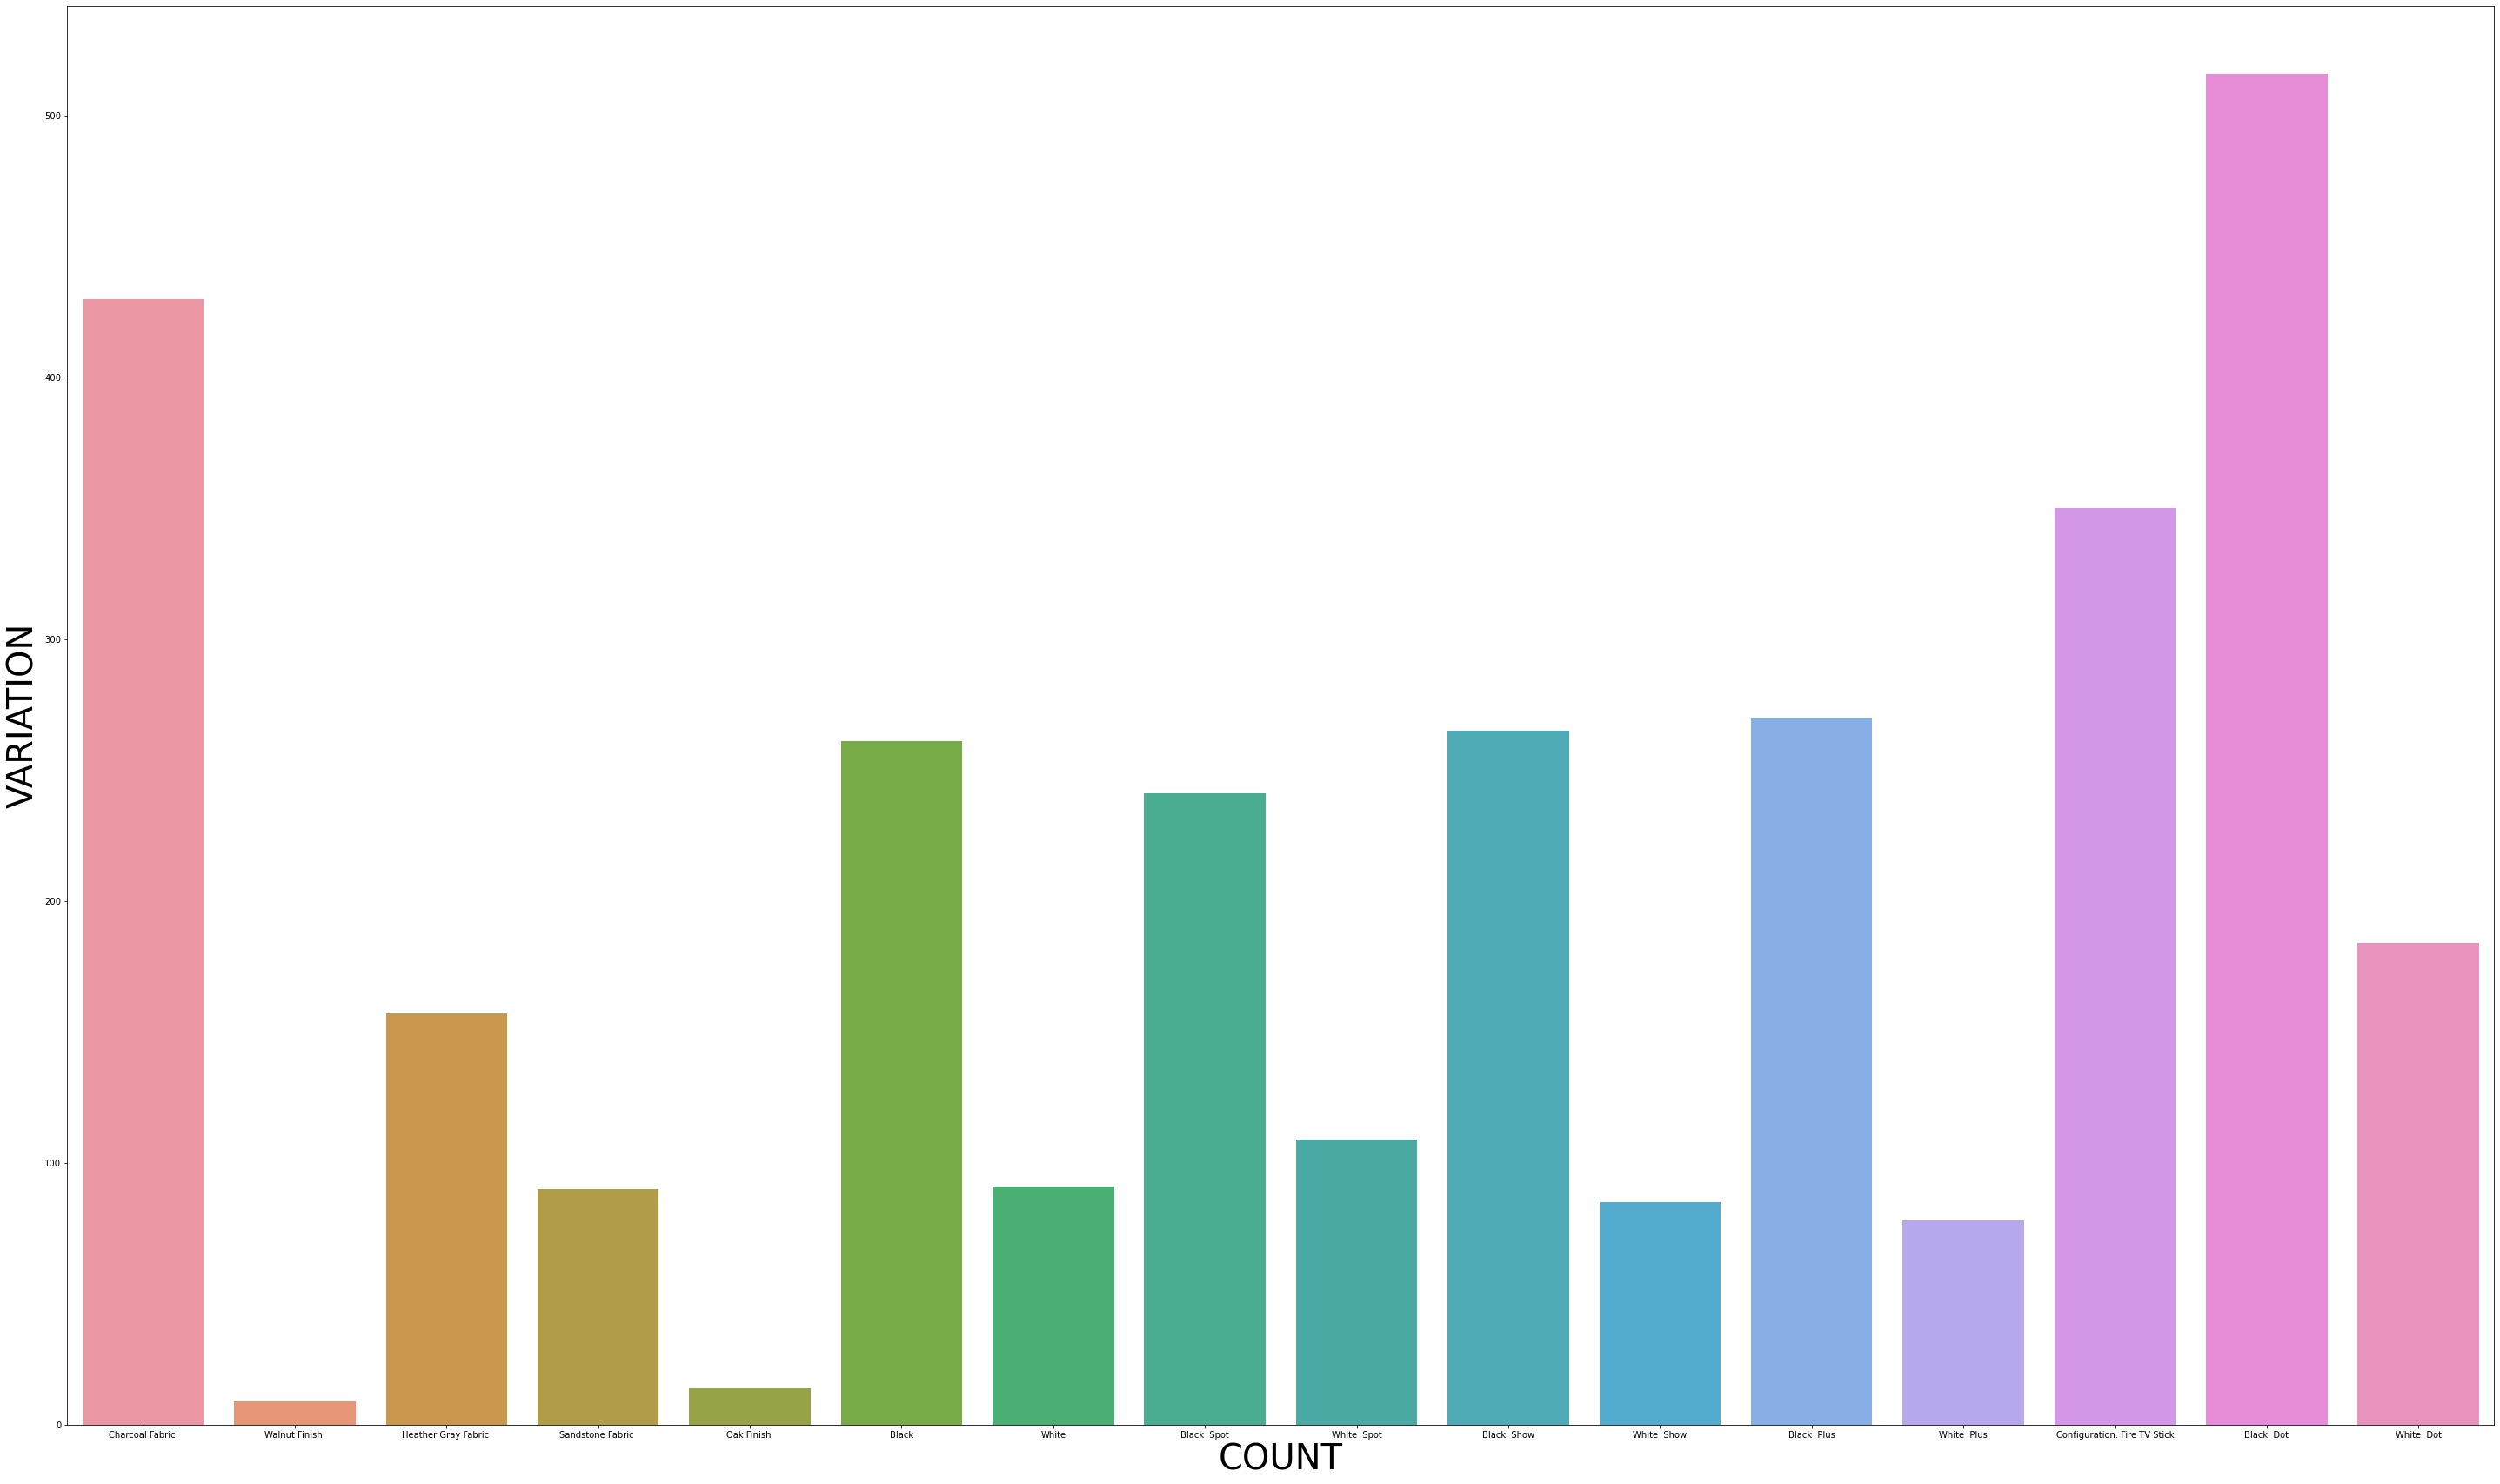

In [62]:
fig, ax = plt.subplots(figsize=(50, 30))
sns.countplot(data['variation'],label='count',ax=ax)
plt.xlabel('COUNT',size=40)
plt.ylabel('VARIATION',size=40)

<br> Let's see the distribution of the 'feedback' column <br>

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

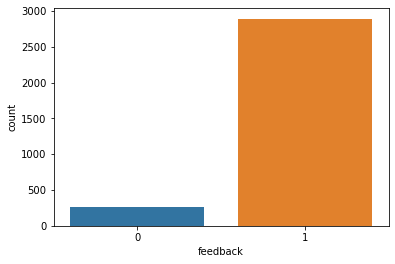

In [63]:
sns.countplot(data['feedback'],label='count')

<br> Adding a new column 'length' to view the length of each review <br>

In [64]:
data['length'] = data['verified_reviews'].apply(len)
data['length']

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: length, Length: 3150, dtype: int64

In [65]:
data.head()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback,length
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [66]:
data.tail()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback,length
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380
3149,3149,4,29-Jul-18,Black Dot,Good,1,4


In [67]:
data.describe()

,Unnamed: 0,rating,feedback,length
count,3150.000,3150.000000,3150.000000,3150.000000
mean,1574.500,4.463175,0.918413,132.049524
std,909.471,1.068506,0.273778,182.099952
min,0.000,1.000000,0.000000,1.000000
25%,787.250,4.000000,1.000000,30.000000
50%,1574.500,5.000000,1.000000,74.000000
75%,2361.750,5.000000,1.000000,165.000000
max,3149.000,5.000000,1.000000,2851.000000


<br>Plotting histogram for the 'length' column to view the distribution<br>

<AxesSubplot:>

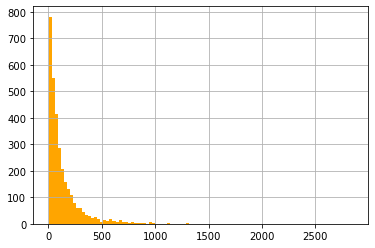

In [68]:
data['length'].hist(bins=100, color ='orange')

We can see that in general, a lot of customers left really short reviews

In [69]:
### Let's get the statistical summary again
data.describe()

,Unnamed: 0,rating,feedback,length
count,3150.000,3150.000000,3150.000000,3150.000000
mean,1574.500,4.463175,0.918413,132.049524
std,909.471,1.068506,0.273778,182.099952
min,0.000,1.000000,0.000000,1.000000
25%,787.250,4.000000,1.000000,30.000000
50%,1574.500,5.000000,1.000000,74.000000
75%,2361.750,5.000000,1.000000,165.000000
max,3149.000,5.000000,1.000000,2851.000000


we can see that the shortest review length was just one word, the average was 132 and the longest was 2851 characters

## Lets check shortest review

In [70]:
data[data['length'] == 2]['verified_reviews'].iloc[0]

'👍🏻'

## Let's see the first review with the average number of characters

In [71]:
data[data['length'] == 152]['verified_reviews'].iloc[0]

"I love my Echo. It's easy to operate, loads of fun.It is everything as advertised. I use it mainly to play my favorite tunes and test Alexa's knowledge."

## Let's see the longest review

In [72]:
data[data['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

# PLOTTING WORDCLOUDS

First, let's split the 'feedback' column into positive and negative reviews so we can plot separate wordlcouds

In [73]:
positive_review=data[data['feedback']==1]
positive_review

,Unnamed: 0,rating,date,variation,verified_reviews,feedback,length
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...,...
3145,3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [74]:
negative_review=data[data['feedback']==0]
negative_review

,Unnamed: 0,rating,date,variation,verified_reviews,feedback,length
46,46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...,...
3047,3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [75]:
reviews = data['verified_reviews'].tolist()
len(reviews)

3150

In [76]:
reviews_as_one_string =" ".join(reviews)
reviews_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

# Word Cloud

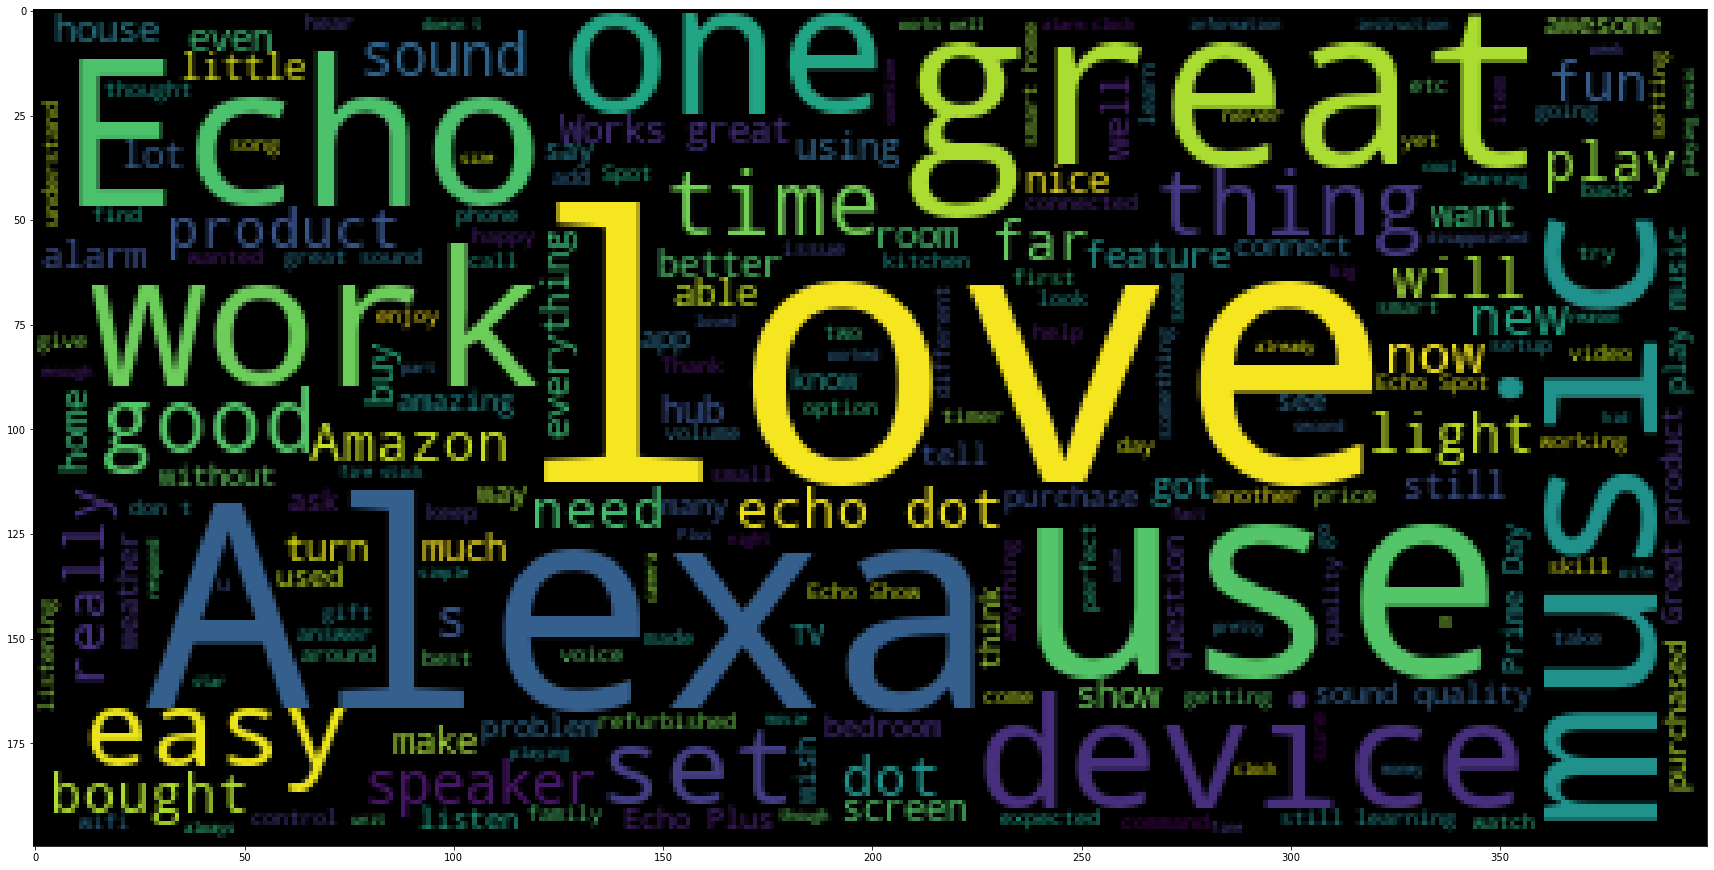

In [77]:
from wordcloud import WordCloud
plt.figure(figsize=(30,30))
plt.imshow(WordCloud().generate(reviews_as_one_string))

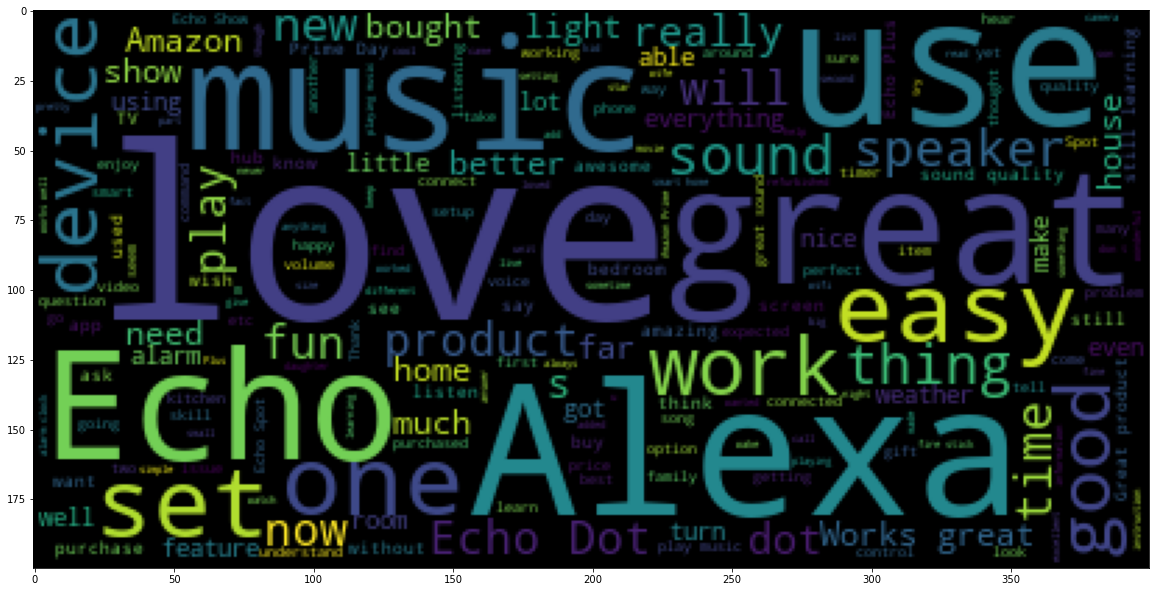

In [78]:
positive_list = positive_review['verified_reviews'].tolist()
positive_reviews_as_one_string =" ".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_reviews_as_one_string))

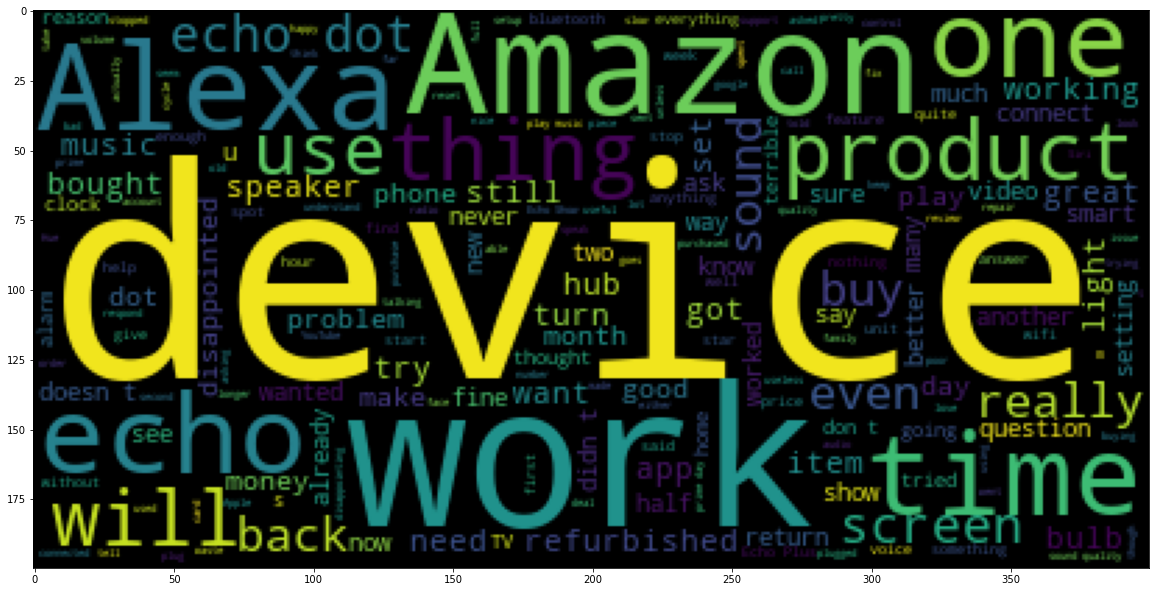

In [79]:
negative_list = negative_review['verified_reviews'].tolist()
negative_review_as_one_string =" ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_review_as_one_string))

# DATA CLEANING - REMOVING PUNCTUATIONS AND STOPWORDS FROM TEXT

Stopwords are the most common words in any language. By removing stopwords and punctuations, we remove low-level information from our text in order to give the important information more focus

In [80]:
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

lm = WordNetLemmatizer()
sw = stopwords.words('English')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [81]:
clean=[]
for i in range(0,3150):
    
    #replace non-letter with space
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i] )
    
    #convert all to lower case
    review=review.lower()
    
    #split
    review=review.split()
    
    #Lemmanization
    lm = WordNetLemmatizer()
    
    #review=[ps.stem(word) for word in review if not word in stopwords]
    review = [lm.lemmatize(word) for word in review if word not in sw] 
    review=' '.join(review)
    clean.append(review)

In [82]:
print(clean)

['love echo', 'loved', 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home', 'lot fun thing yr old learns dinosaur control light play game like category nice sound playing music well', 'music', 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else', 'without cellphone cannot use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet', 'think th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house', 'look great', 'love listened song heard since childhood get news weather information great', 'sent year old dad talk constantly', 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time', 'purchased mother knee problem give som

# PERFORMING COUNT VECTORIZATION

In [83]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(clean).toarray()
y =data['feedback']
print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [84]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [85]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64


In [86]:
X = pd.DataFrame(x)
X

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TRAIN AND TEST ML MODELS

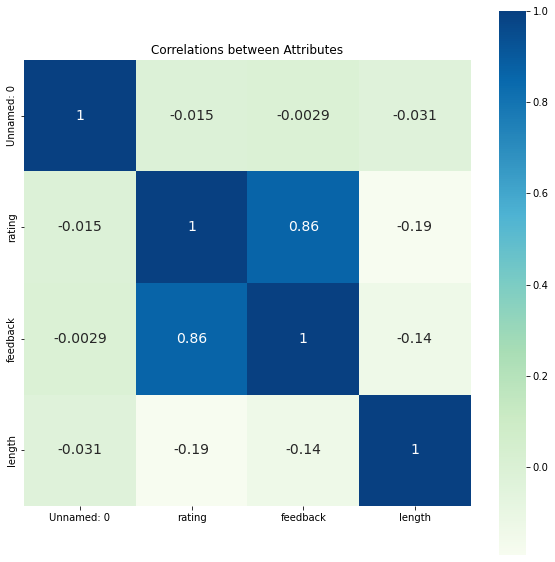

In [87]:
# Before going through machine learning applications, 
fig = plt.subplots (figsize = (10, 10))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 14})
plt.title('Correlations between Attributes')
plt.show ()

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


## DATA PRE-PROCESSING

In [89]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)
print(x_train.shape)
print(x_test.shape)

(2205, 2500)
(945, 2500)


##  Multinomial Naïve Bayes

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

model_NB = MultinomialNB()
model_NB.fit(x_train, y_train)
y_pred_NB = model_NB.predict(x_test)
Train_acc_NB = model_NB.score(x_train, y_train)
cm_NB = confusion_matrix(y_test, y_pred_NB)
acc_NB = accuracy_score(y_pred_NB,y_test)

print("Training Accuracy :",Train_acc_NB)
print("Naive_Baiyes Model accuracy is ",acc_NB)
print("Confusion Matrix is \n",cm_NB)
print("Classification Report : \n",classification_report(y_test, y_pred_NB))
pd.crosstab(y_test, y_pred_NB, rownames=['Actual Class'], colnames=['Predicted Class'])

Training Accuracy : 0.963265306122449
Naive_Baiyes Model accuracy is  0.9291005291005291
Confusion Matrix is 
 [[ 27  55]
 [ 12 851]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.33      0.45        82
           1       0.94      0.99      0.96       863

    accuracy                           0.93       945
   macro avg       0.82      0.66      0.70       945
weighted avg       0.92      0.93      0.92       945



Predicted Class,0,1
Actual Class,,
0,27,55
1,12,851


##  Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

model_LR = LogisticRegression(multi_class = 'multinomial')
model_LR.fit(x_train, y_train)
y_pred_LR = model_LR.predict(x_test)
Train_acc_LR = model_LR.score(x_train, y_train)
cm_LR = confusion_matrix(y_test, y_pred_LR)
acc_LR = accuracy_score(y_pred_LR,y_test)

print("Training Accuracy :",Train_acc_LR)
print("Logistics Regression Model accuracy is ",acc_LR)
print("Confusion Matrix is \n",cm_LR)
print("Classification Report : \n",classification_report(y_test, y_pred_LR))
pd.crosstab(y_test, y_pred_LR, rownames=['Actual Class'], colnames=['Predicted Class'])

Training Accuracy : 0.9777777777777777
Logistics Regression Model accuracy is  0.9322751322751323
Confusion Matrix is 
 [[ 24  58]
 [  6 857]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.29      0.43        82
           1       0.94      0.99      0.96       863

    accuracy                           0.93       945
   macro avg       0.87      0.64      0.70       945
weighted avg       0.92      0.93      0.92       945



Predicted Class,0,1
Actual Class,,
0,24,58
1,6,857


##  KNN Classification

In [92]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)
Train_acc_KNN = model_KNN.score(x_train, y_train)
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
acc_KNN = accuracy_score(y_pred_KNN,y_test)

print("Training Accuracy :",Train_acc_KNN)
print("K-Nearest Neighbors Model accuracy is ",acc_KNN)
print("Confusion Matrix is \n",cm_LR)
print("Classification Report : \n",classification_report(y_test, y_pred_KNN))
pd.crosstab(y_test, y_pred_KNN, rownames=['Actual Class'], colnames=['Predicted Class'])

Training Accuracy : 0.9505668934240363
K-Nearest Neighbors Model accuracy is  0.9227513227513228
Confusion Matrix is 
 [[ 24  58]
 [  6 857]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.12      0.22        82
           1       0.92      1.00      0.96       863

    accuracy                           0.92       945
   macro avg       0.92      0.56      0.59       945
weighted avg       0.92      0.92      0.89       945



Predicted Class,0,1
Actual Class,,
0,10,72
1,1,862


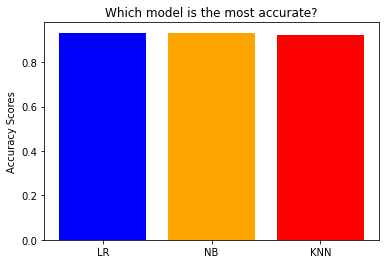

In [93]:
models = ['LR', 'NB', 'KNN']
acc_scores = [acc_LR,acc_NB,acc_KNN]

plt.bar(models, acc_scores, color=['blue', 'orange', 'red'])
plt.ylabel("Accuracy Scores")
plt.title("Which model is the most accurate?")
plt.show()

In [94]:
print('Logistic Regression Accuracy : ',acc_LR*100)
print('Multinomial Naïve Bayes Accuracy : ',acc_NB*100)
print('KNN Classifier Accuracy : ',acc_KNN*100)

Logistic Regression Accuracy :  93.22751322751323
Multinomial Naïve Bayes Accuracy :  92.91005291005291
KNN Classifier Accuracy :  92.27513227513228


# Logistic Regression  is the best model with the best accuracy.

In [95]:
results = pd.DataFrame(data = {'Y Test': y_test, 'Y Predictions': y_pred_LR})
results.head()

,Y Test,Y Predictions
2293,1,1
288,1,1
2806,1,1
807,1,1
2954,1,1


In [96]:
results.tail()

,Y Test,Y Predictions
736,1,1
1404,1,1
2210,1,1
789,1,1
281,1,1
